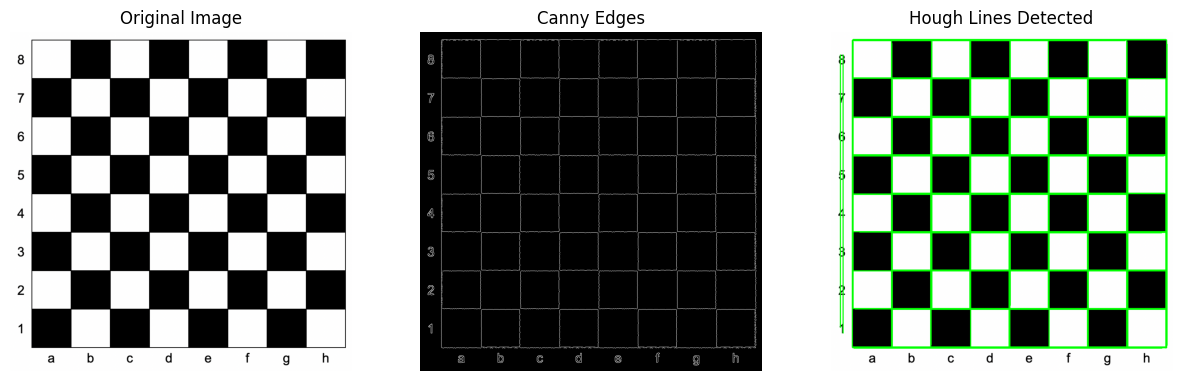

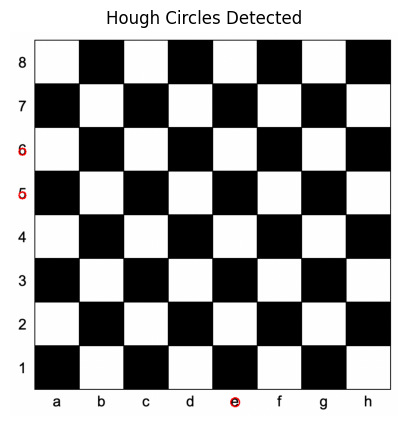

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('chessy.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny Edge Detection
edges = cv2.Canny(gray, 50, 150)

# Hough Line Transform
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 68, minLineLength=15, maxLineGap=250)

# Draw detected lines on the image
line_img = image.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Hough Circle Transform
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=5, maxRadius=50)

# Draw detected circles on the image
circle_img = image.copy()
if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        cv2.circle(circle_img, (i[0], i[1]), i[2], (0, 0, 255), 2)

# Display images
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(edges, cmap='gray')
ax[1].set_title('Canny Edges')
ax[1].axis('off')

ax[2].imshow(cv2.cvtColor(line_img, cv2.COLOR_BGR2RGB))
ax[2].set_title('Hough Lines Detected')
ax[2].axis('off')

plt.show()

# Display circles
plt.figure(figsize=(5, 5))
plt.imshow(cv2.cvtColor(circle_img, cv2.COLOR_BGR2RGB))
plt.title('Hough Circles Detected')
plt.axis('off')
plt.show()


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

# Transform for normalizing images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize for object detection
    transforms.ToTensor(),
])

# Load Fashion-MNIST
fashion_mnist_train = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
fashion_mnist_test = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

# Load CIFAR-100
cifar100_train = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
cifar100_test = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

print("Datasets loaded successfully!")


100%|██████████| 26.4M/26.4M [00:01<00:00, 15.7MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 266kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 4.95MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 11.2MB/s]
100%|██████████| 169M/169M [00:01<00:00, 88.6MB/s]


Datasets loaded successfully!


In [ ]:
!pip install torch torchvision opencv-python numpy matplotlib ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 847.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.1/994.1 kB 45.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torch.utils.data import DataLoader, Dataset
from ultralytics import YOLO

# Step 1: Load the Fashion MNIST dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize for CNNs
    transforms.ToTensor()
])

# Load dataset
fashion_mnist = torchvision.datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)

# Step 2: Create a Custom Dataset with Synthetic Bounding Boxes
class CustomObjectDetectionDataset(Dataset):
    def __init__(self, dataset):
        self.dataset = dataset

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        image, label = self.dataset[idx]
        bbox = torch.tensor([[50, 50, 150, 150]], dtype=torch.float32)  # Fixed bounding box
        target = {"boxes": bbox, "labels": torch.tensor([label], dtype=torch.int64)}
        return image, target  # Ensure target is a dictionary

# Custom collate function to handle batch processing
def collate_fn(batch):
    images, targets = zip(*batch)  # Unzip batch
    images = list(images)  # Keep images as list
    targets = list(targets)  # Keep targets as list of dictionaries
    return images, targets

# Create DataLoader
train_dataset = CustomObjectDetectionDataset(fashion_mnist)
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True, collate_fn=collate_fn)

# Step 3: Train Faster R-CNN
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pre-trained Faster R-CNN model
model_frcnn = fasterrcnn_resnet50_fpn(pretrained=True)
num_classes = 11  # 10 classes + 1 for background
in_features = model_frcnn.roi_heads.box_predictor.cls_score.in_features
model_frcnn.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes)

model_frcnn.to(device)
optimizer = torch.optim.Adam(model_frcnn.parameters(), lr=0.001)

# Training loop (simplified)
for epoch in range(2):
    model_frcnn.train()
    for images, targets in train_loader:
        images = [img.to(device) for img in images]
        targets = [{k: v.to(device) for k, v in target.items()} for target in targets]

        loss_dict = model_frcnn(images, targets)
        loss = sum(loss for loss in loss_dict.values())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

# Step 4: Train YOLO (Using YOLOv8)
!yolo task=detect mode=train model=yolov8n.pt data=coco128.yaml epochs=5 imgsz=224

# Step 5: Test Faster R-CNN on a Sample Image
model_frcnn.eval()
image, _ = train_dataset[0]
image = image.unsqueeze(0).to(device)
with torch.no_grad():
    prediction = model_frcnn(image)

# Visualize result
image_np = image.squeeze(0).permute(1, 2, 0).cpu().numpy()
plt.imshow(image_np, cmap='gray')

for box in prediction[0]['boxes']:
    x_min, y_min, x_max, y_max = box.cpu().numpy()
    plt.gca().add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, edgecolor='red', linewidth=2))

plt.show()


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:02<00:00, 83.5MB/s]


KeyboardInterrupt: 